# Fase 1 | Avance de Proyecto

---

# Planteamiento del Problema

El cáncer de tiroides es una enfermedad tratable, pero su **recurrencia** representa un desafío para el manejo a largo plazo de los pacientes. El objetivo principal de este conjunto de datos es construir un modelo predictivo que:

1. **Prediga con precisión** qué pacientes tendrán una recurrencia del cáncer de tiroides bien diferenciado.
2. **Identifique las características** clínico-patológicas más influyentes en la predicción de la recurrencia (e.g., ¿la edad o el género tienen un impacto significativo?).
3. **Sea robusto a lo largo del tiempo**, dado que los datos abarcan un periodo de 15 años.

### Preguntas clave:
- **¿Es posible predecir la recurrencia del cáncer de manera precisa utilizando Machine Learning?**
- **¿Cuáles son las características más influyentes para predecir la recurrencia?**
- **¿Cómo manejar la variabilidad temporal en los datos para crear un modelo robusto a largo plazo?**

---

# Impacto Clínico

Este conjunto de datos tiene un **potencial significativo para mejorar la gestión clínica** del cáncer de tiroides. Al utilizar estos datos, los médicos pueden contar con herramientas predictivas que les ayuden a **pronosticar la recurrencia** de la enfermedad con mayor precisión, lo que les permitirá **ajustar los planes de tratamiento** de forma más personalizada y efectiva. 

Al predecir con mayor exactitud qué pacientes tienen un mayor riesgo de recurrencia, se pueden aplicar tratamientos más agresivos o realizar seguimientos más cercanos en aquellos casos que lo necesiten, optimizando los recursos y mejorando la **calidad de vida** de los pacientes.

Además, dado que el conjunto de datos no contiene **restricciones éticas adicionales** ni **información sensible**, su uso es ideal para **estudios secundarios** y puede ser empleado en investigaciones abiertas, colaboraciones internacionales o **demostraciones públicas** de inteligencia artificial aplicada a la medicina. Esto facilita su empleo en la creación y validación de modelos de aprendizaje automático, acelerando el desarrollo de tecnologías que pueden tener un impacto real y positivo en el diagnóstico, tratamiento y seguimiento de pacientes con cáncer de tiroides.


---

# Resumen del Conjunto de Datos

El conjunto de datos **Differentiated Thyroid Cancer Recurrence** tiene como objetivo predecir la recurrencia del cáncer de tiroides bien diferenciado en pacientes, utilizando **13 características clinicopatológicas**. El conjunto fue recopilado durante un periodo de **15 años** y cada paciente fue seguido durante al menos **10 años**, proporcionando un historial clínico robusto para el análisis.

### Características del Conjunto de Datos:
- **Número de instancias:** 383 pacientes
- **Número de características:** 16 (incluyendo variables demográficas, clínicas y la columna objetivo)
- **Columna objetivo:** `"Recurred"` (indicando si el paciente ha tenido una recurrencia del cáncer)
- **Tipos de variables:** Reales, categóricas e integer
- **Valores faltantes:** Ninguno

Este conjunto ofrece la oportunidad de aplicar técnicas de *Machine Learning* para predecir la **recurrencia del cáncer de tiroides** y apoyar la toma de decisiones clínicas.

---

### Referencia:
- Publicación del estudio en 2023 sobre el uso de **Machine Learning** para la estratificación del riesgo en pacientes con cáncer de tiroides.
- recuperaso el 10/10/24 de: https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence



--- Estructura inicial del conjunto de datos: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    o

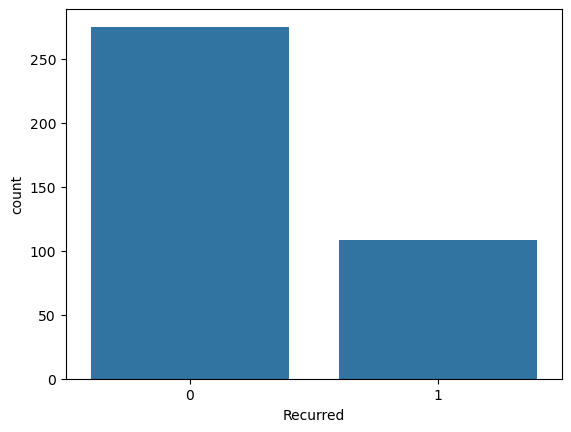


--- Mapa de calor de la correlación entre características: ---


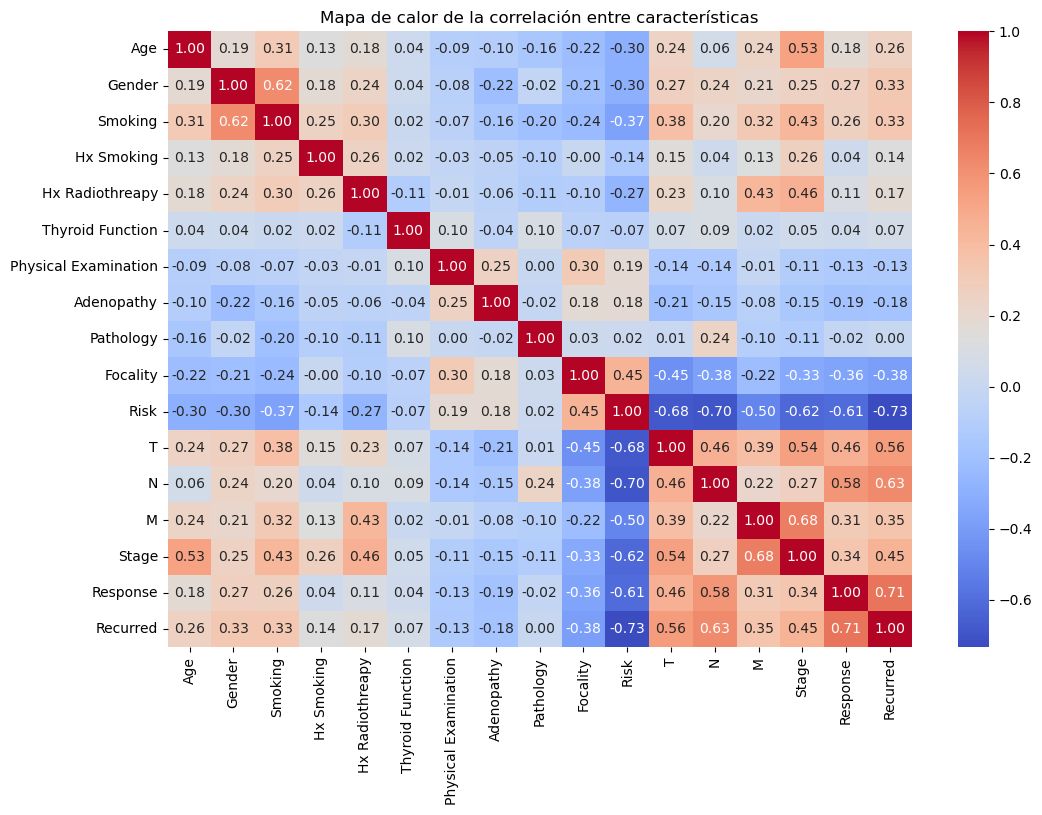


--- Histograma de las características numéricas: ---


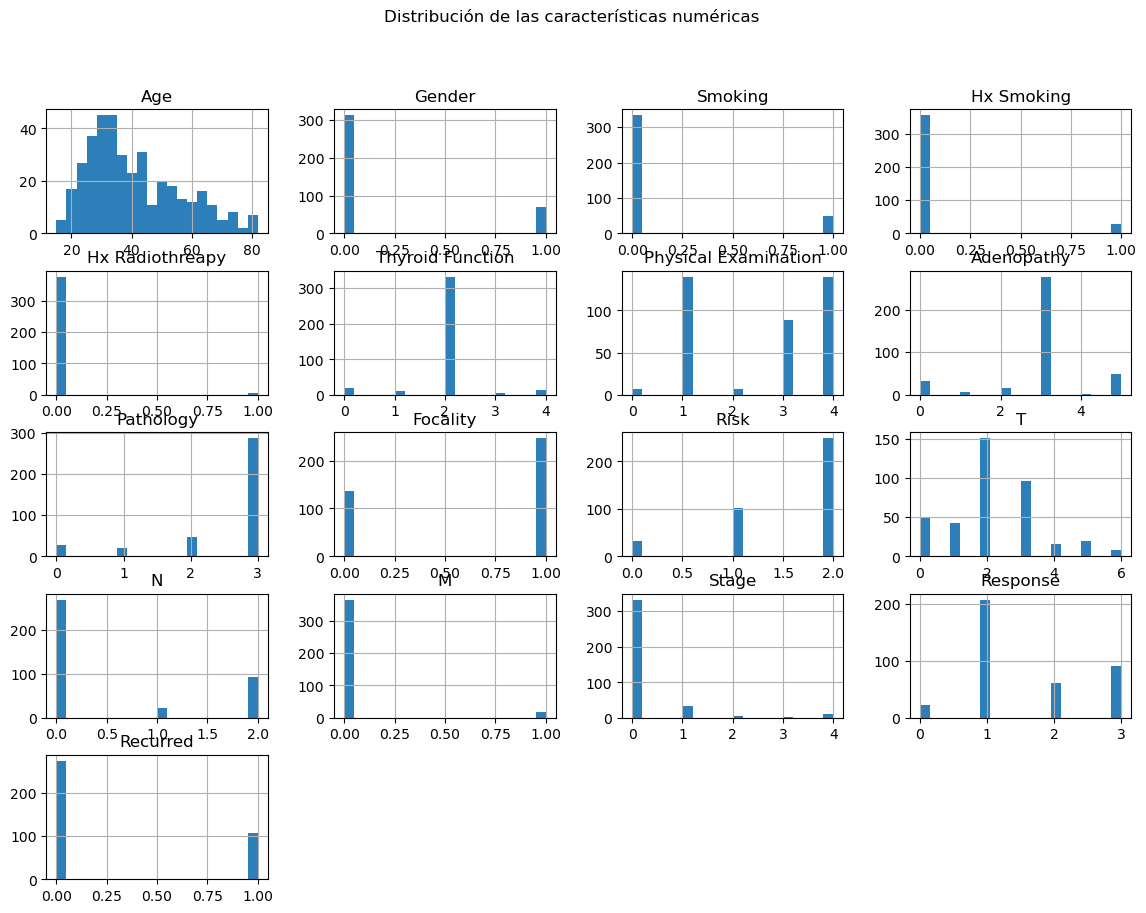


--- Entrenando el modelo Random Forest: ---

--- Reporte de clasificación del modelo: ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        83
           1       0.97      0.97      0.97        32

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115


--- Matriz de confusión del modelo: ---
[[82  1]
 [ 1 31]]

--- Realizando Grid Search para optimización: ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Mejores hiperparámetros encontrados por Grid Search: ---
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

--- Reporte de clasificación del modelo optimizado: ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        83
           1       0.97      0.97      0.97        32

    accuracy                           0.98       115
   macr

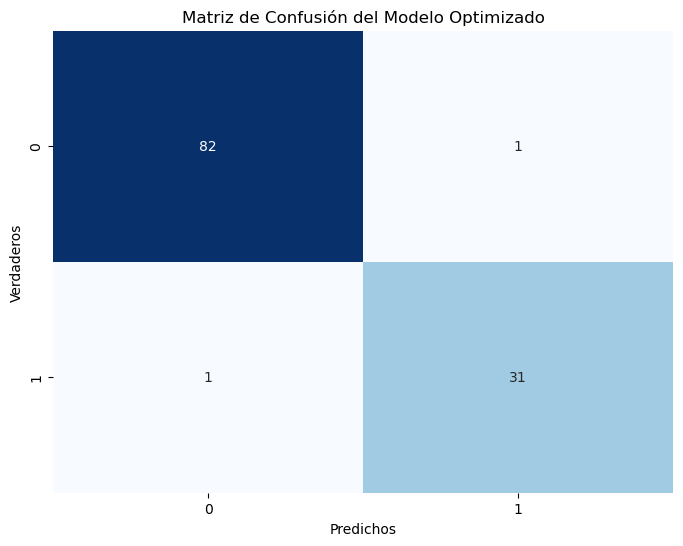


--- Curva ROC (AUC = 0.99): ---


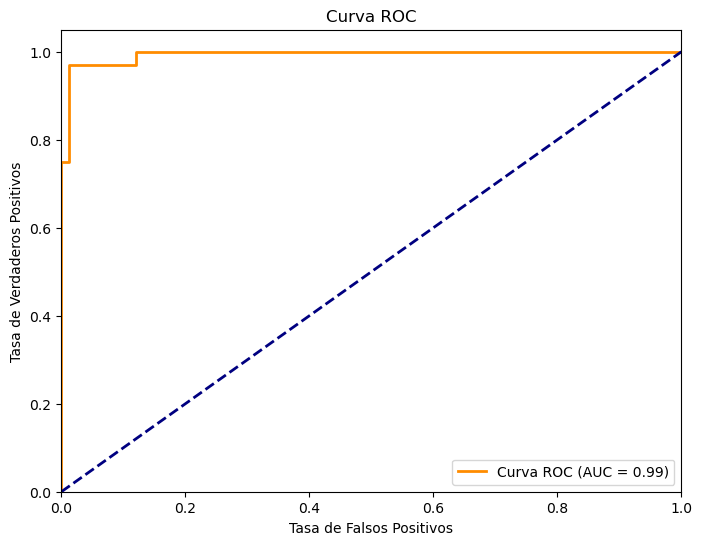


--- Importancia de las características: ---


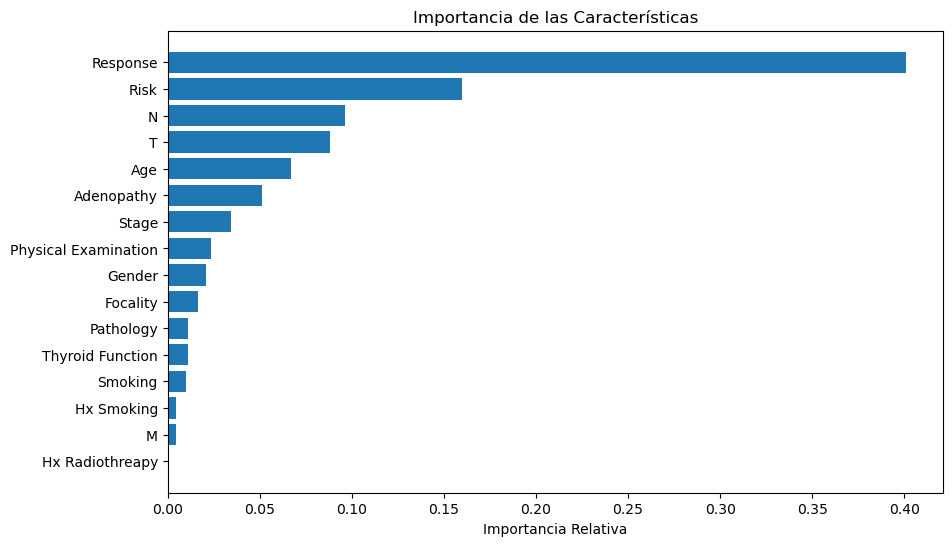


--- Conclusiones finales: ---
1. El modelo Random Forest ha demostrado ser efectivo en la clasificación de recurrencias de cáncer de tiroides diferenciado.
2. La curva ROC muestra una alta capacidad de predicción.
3. La importancia de características revela qué variables tienen un mayor impacto en las predicciones.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
class ThyroidCancerModel:

    
    def __init__(self, dataset_id=915, data_url=None):
        """
        Constructor para inicializar el modelo y cargar el dataset.
        """
        self.dataset_id = dataset_id
        self.data_url = data_url
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.model = None
        self.best_model = None

    def load_data(self):
        """
        Carga los datos de la fuente UCI y verifica la estructura.
        """
        if self.data_url:
            self.df = pd.read_csv(self.data_url)
        else:
            data = fetch_ucirepo(id=self.dataset_id)
            self.df = pd.DataFrame(data.data.features, columns=data.variables['X'])
            self.df['Recurred'] = data.data.targets
        
        print("\n--- Estructura inicial del conjunto de datos: ---")
        print(self.df.info())
        
        print("\n--- Verificación de valores nulos en el conjunto de datos: ---")
        print(self.df.isnull().sum())

    def preprocess_data(self):
        """
        Preprocesa los datos, aplica Label Encoding a variables categóricas y divide en conjuntos de entrenamiento y prueba.
        """
        print("\n--- Preprocesando los datos: ---")
        
        le = LabelEncoder()
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            self.df[col] = le.fit_transform(self.df[col])
        
        X = self.df.drop(columns=['Recurred'])
        y = self.df['Recurred']
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

    def explore_data(self):
        """
        Realiza análisis exploratorio de datos (EDA).
        """
        print("\n--- Distribución de la variable objetivo: ---")
        sns.countplot(x='Recurred', data=self.df)
        plt.show()
        
        print("\n--- Mapa de calor de la correlación entre características: ---")
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Mapa de calor de la correlación entre características")
        plt.show()
        
        print("\n--- Histograma de las características numéricas: ---")
        self.df.hist(bins=20, figsize=(14, 10), color='#2c7fb8')
        plt.suptitle("Distribución de las características numéricas")
        plt.show()

    def train_model(self):
        """
        Entrena un modelo de Random Forest.
        """
        print("\n--- Entrenando el modelo Random Forest: ---")
        self.model = RandomForestClassifier(random_state=42)
        self.model.fit(self.X_train, self.y_train)
        
        y_pred = self.model.predict(self.X_test)
        
        print("\n--- Reporte de clasificación del modelo: ---")
        print(classification_report(self.y_test, y_pred))
        
        print("\n--- Matriz de confusión del modelo: ---")
        print(confusion_matrix(self.y_test, y_pred))

    def optimize_model(self):
        """
        Realiza optimización del modelo usando Grid Search.
        """
        print("\n--- Realizando Grid Search para optimización: ---")
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=self.model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
        grid_search.fit(self.X_train, self.y_train)
        
        self.best_model = grid_search.best_estimator_
        
        print("\n--- Mejores hiperparámetros encontrados por Grid Search: ---")
        print(grid_search.best_params_)

    def evaluate_model(self):
        """
        Evalúa el modelo optimizado y visualiza la matriz de confusión y la curva ROC.
        """
        y_pred_best = self.best_model.predict(self.X_test)
        
        print("\n--- Reporte de clasificación del modelo optimizado: ---")
        print(classification_report(self.y_test, y_pred_best))
        
        print("\n--- Matriz de confusión del modelo optimizado: ---")
        print(confusion_matrix(self.y_test, y_pred_best))
        
        # Visualización de la matriz de confusión
        plt.figure(figsize=(8,6))
        sns.heatmap(confusion_matrix(self.y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title("Matriz de Confusión del Modelo Optimizado")
        plt.ylabel('Verdaderos')
        plt.xlabel('Predichos')
        plt.show()

        # Curva ROC y AUC
        y_prob = self.best_model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        print(f"\n--- Curva ROC (AUC = {roc_auc:.2f}): ---")
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

    def feature_importance(self):
        """
        Muestra la importancia de las características del modelo optimizado.
        """
        importances = self.best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        features = self.df.drop(columns=['Recurred']).columns
        
        print("\n--- Importancia de las características: ---")
        plt.figure(figsize=(10,6))
        plt.title("Importancia de las Características")
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Importancia Relativa')
        plt.gca().invert_yaxis()
        plt.show()

    def conclusions(self):
        """
        Muestra las conclusiones finales del proceso de modelado.
        """
        print("\n--- Conclusiones finales: ---")
        print("1. El modelo Random Forest ha demostrado ser efectivo en la clasificación de recurrencias de cáncer de tiroides diferenciado.")
        print("2. La curva ROC muestra una alta capacidad de predicción.")
        print("3. La importancia de características revela qué variables tienen un mayor impacto en las predicciones.")

# Uso de la clase
if __name__ == "__main__":
    thyroid_model = ThyroidCancerModel(data_url='https://archive.ics.uci.edu/static/public/915/data.csv')
    
    thyroid_model.load_data()
    thyroid_model.preprocess_data()
    thyroid_model.explore_data()
    thyroid_model.train_model()
    thyroid_model.optimize_model()
    thyroid_model.evaluate_model()
    thyroid_model.feature_importance()
    thyroid_model.conclusions()
